# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83989 entries, 0 to 83988
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             83989 non-null  int64  
 1   start_time               83989 non-null  object 
 2   end_time                 83989 non-null  object 
 3   start_station_id         83862 non-null  float64
 4   start_station_name       83862 non-null  object 
 5   start_station_latitude   83989 non-null  float64
 6   start_station_longitude  83989 non-null  float64
 7   end_station_id           83862 non-null  float64
 8   end_station_name         83862 non-null  object 
 9   end_station_latitude     83989 non-null  float64
 10  end_station_longitude    83989 non-null  float64
 11  bike_id                  83989 non-null  int64  
 12  user_type                83989 non-null  object 
 13  member_birth_year        80368 non-null  float64
 14  member_gender         

In [4]:
df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,83989.000000,83862.000000,83989.000000,83989.000000,83862.000000,83989.000000,83989.000000,83989.000000,80368.000000
mean,729.440451,138.765412,37.770976,-122.353462,136.345246,37.771218,-122.352980,4840.779316,1984.796175
std,1668.896533,112.392050,0.099432,0.117107,112.169937,0.099349,0.116684,1603.806593,10.218244
min,61.000000,3.000000,37.317298,-122.453705,3.000000,37.317298,-122.453705,11.000000,1878.000000
25%,327.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,4509.000000,1980.000000
50%,521.000000,102.000000,37.780526,-122.398436,99.000000,37.780955,-122.398285,5239.000000,1987.000000
75%,809.000000,239.000000,37.797280,-122.288665,238.000000,37.797280,-122.289415,6034.000000,1992.000000
max,83195.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6644.000000,2001.000000


### What is the structure of your dataset?

> The dataset contains 83989 rows and 16 columns, but in my analysis I won't be using the columns for location (latitude, longitude).

### What is/are the main feature(s) of interest in your dataset?

> - The differant in the duration in the bike rides
> - The differant between customer type
> - Age of our riders
> - Gender of our rider

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - duration_sec
> - user_type
> - member_birth_year
> - member_gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


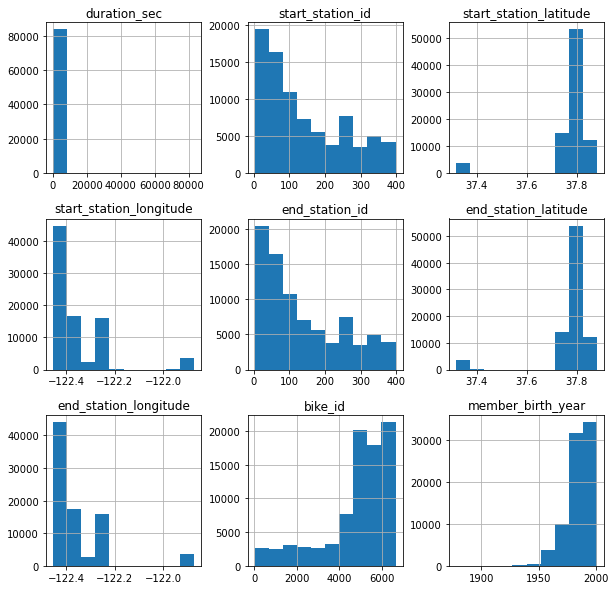

In [5]:
# hist to view how are the data distributed
df.hist(figsize=(10,10));

**The plots shows that** 
> - We need to look further in the duration there might be many outliers

In [6]:
# function to plot histigram
def plot_hist(df,x,bin, quant_max, quant_min):
    # df for the data frame
    # x the value for x that we are ploting
    # bin to create the bins for the plot
    # quant_max to set the quantile for the maximum bin
    # quant_min to set the quantile for the minimum bin
    
    # create the bins, quantile with max and min quantile to remove outliers
    bins = np.arange(df[x].quantile(q=quant_min), df[x].quantile(q=quant_max) + bin, bin)
    

    plt.figure(figsize=(15,5))
    plt.hist(x, data=df, bins=bins)
    plt.title(f'{x} Distribution', weight=('bold'))
    plt.ylabel('Count', weight=('bold'))
    plt.xlabel(x, weight=('bold'))

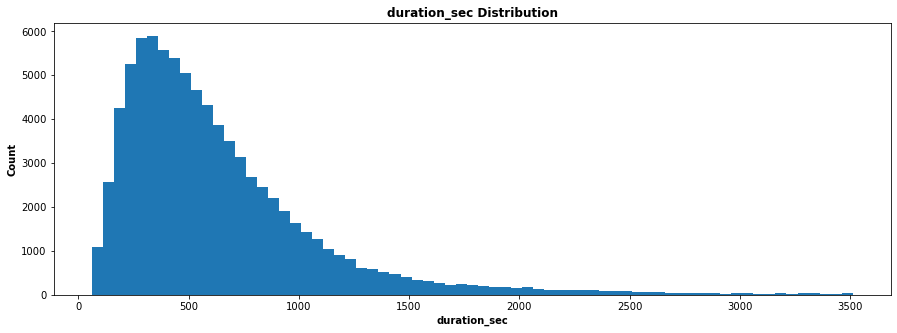

In [7]:
plot_hist(df,'duration_sec', 50, 0.99, 0.0)

Here we can see that the customers mostly rent the bikes from 3 minutes to 12 minutes

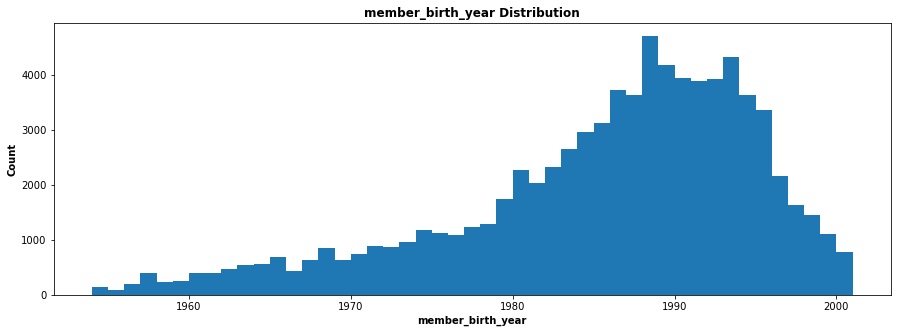

In [8]:
plot_hist(df,'member_birth_year', 1, 1, 0.01)

Here we can see that the customers mostly born between 1980 to 1996

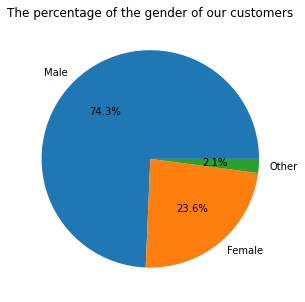

In [9]:
# store the count of each gender
count = df.member_gender.value_counts()

# plot autopct source https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
plt.figure(figsize=(15,5))
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('The percentage of the gender of our customers');

Here we can see that our customers mostly are males with 74.3% and 23.6% for females

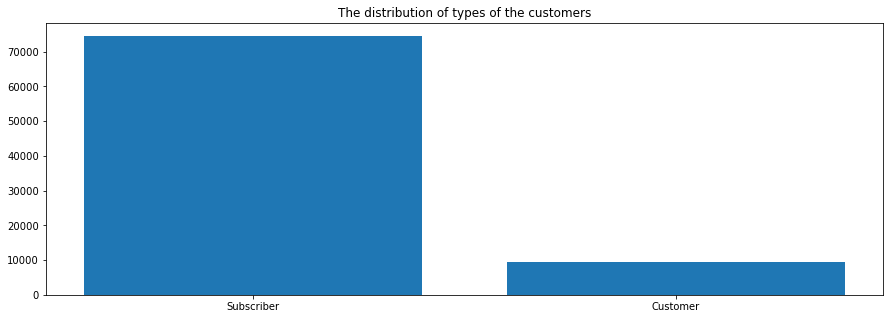

In [10]:
# store the count of each type
count = df.user_type.value_counts()

# bar plot 
plt.figure(figsize=(15,5))
plt.bar(count.index, count)
plt.title('The distribution of types of the customers');

Here we can see that distribution of types of the user are the majority of them are subscribers 

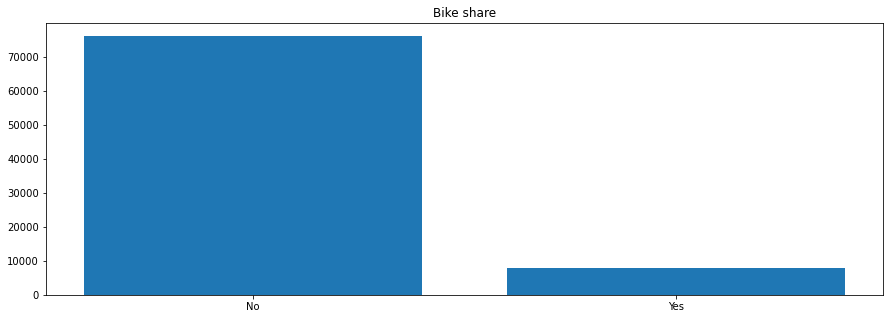

In [11]:
count = df.bike_share_for_all_trip.value_counts()

# bar plot 
plt.figure(figsize=(15,5))
plt.bar(count.index, count)
plt.title('Bike share');

Here we can see that distribution of bike share and mostly are not shared

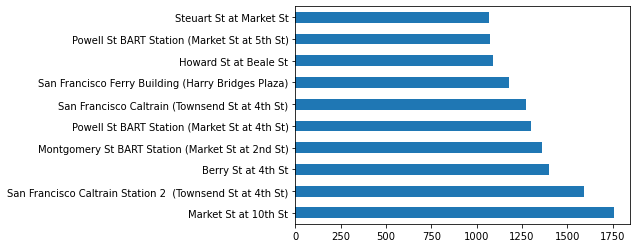

In [12]:
# top 10 start stations
df.start_station_name.value_counts()[:10].plot(kind='barh');

10 most used start stations

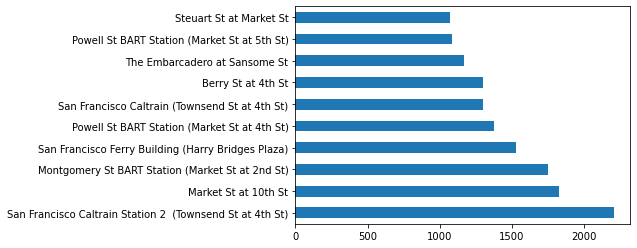

In [13]:
# top 10 end stations
df.end_station_name.value_counts()[:10].plot(kind='barh');

10 most used end stations

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are some unusual points like in the member_birth_year there some of ages that are not feasible so I didn't include the lower 1%.
> Same with duration_sec there are some numbers that is too high I don't know if the customers is allowed to rent for that long
in my plot I didn't include the top 1%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I didn't change anything with the dataset except in the csv file the last row was not fully populated and was causing errors and couldn't read it with pandas so I removed it by using excel.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Is there different in the duration of rented bikes between user types ?

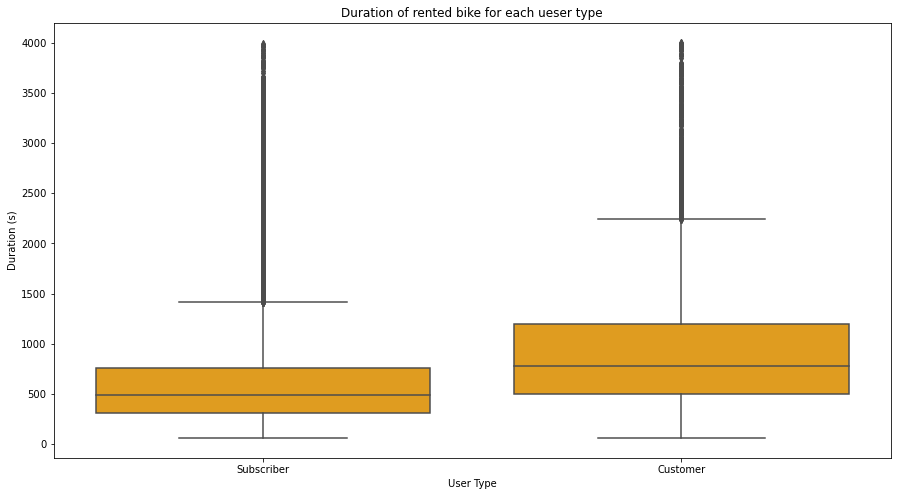

In [14]:
plt.figure(figsize=(15,8))
sb.boxplot(data=df.query('duration_sec <= 4000'),x='user_type',y='duration_sec', color='orange')
plt.title('Duration of rented bike for each ueser type')
plt.xlabel('User Type')
plt.ylabel('Duration (s)');

**Yes** from the plot we can see that the customers are higher than the subscribers

#### Is there relation for birth year and duration ?

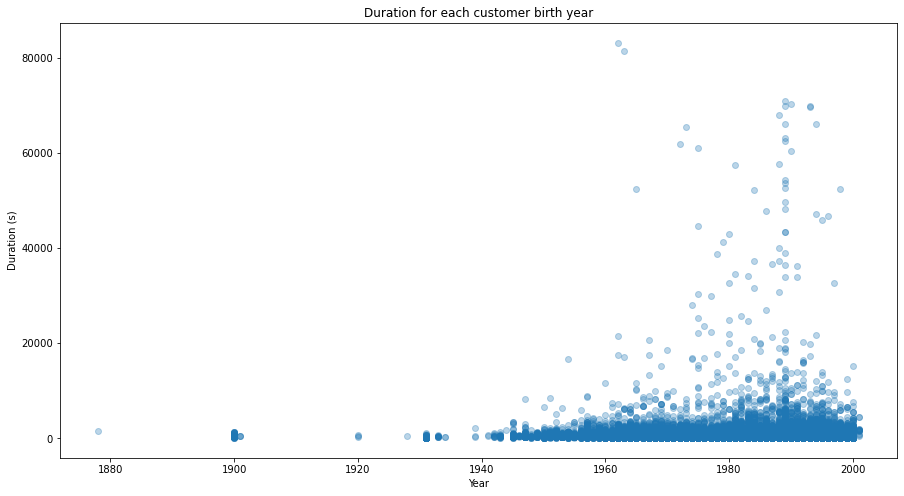

In [15]:
plt.figure(figsize=(15,8))
plt.scatter(data=df,x='member_birth_year', y='duration_sec', alpha=0.3)
plt.title('Duration for each customer birth year')
plt.xlabel('Year')
plt.ylabel('Duration (s)');

**Yes** there is weak relation the younger the customer the more ride time

#### Is there different in ride time between genders ?

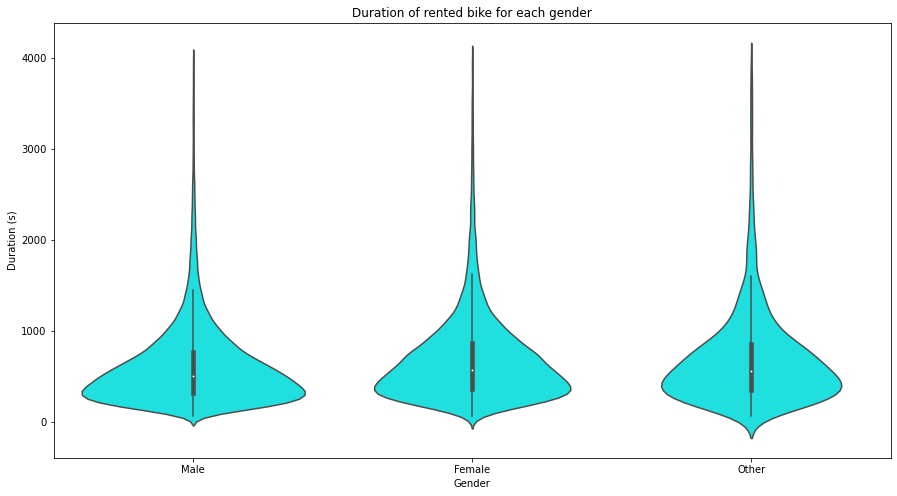

In [16]:
plt.figure(figsize=(15,8))
sb.violinplot(data=df.query('duration_sec <= 4000'),x='member_gender',y='duration_sec', color='cyan')
plt.title('Duration of rented bike for each gender')
plt.xlabel('Gender')
plt.ylabel('Duration (s)');

There are **no** big difference in ride time between genders

#### Is there different in the duration of rented bikes between bike sharing ?

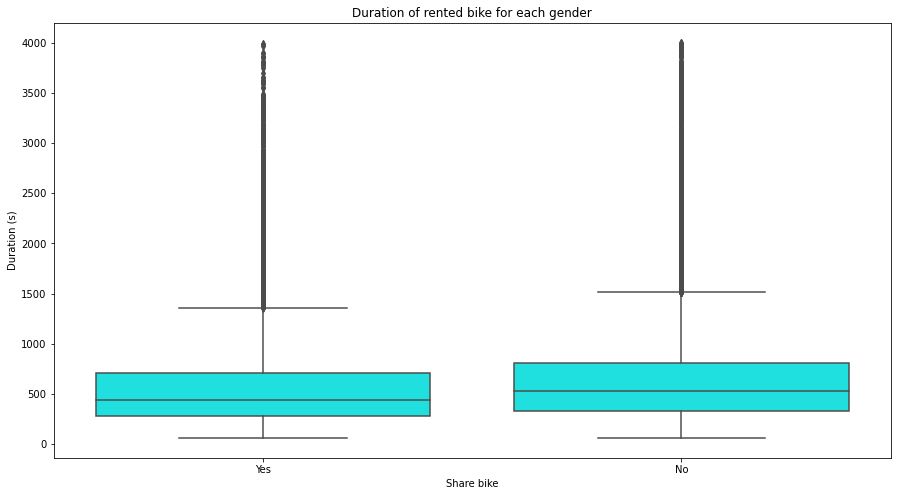

In [17]:
plt.figure(figsize=(15,8))
sb.boxplot(data=df.query('duration_sec <= 4000'),x='bike_share_for_all_trip',y='duration_sec', color='cyan')
plt.title('Duration of rented bike for each gender')
plt.xlabel('Share bike')
plt.ylabel('Duration (s)');

There are **no** big difference

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - First I observed the relationship between the user type and ride duration and found that customers usaly ride longer than subscribers
> - Second I observed the relationship between the user birth year and ride duration and found the younger user ride little longer
> - Third I observed the relationship between the gender and ride duration and there are no big difference
> - Fourth I observed the relationship between the bike sharing and ride duration and there are no big difference
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I didn't observe any interesting relationships between the other features

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Is there relation between bike sharing, user type, and their duration ?

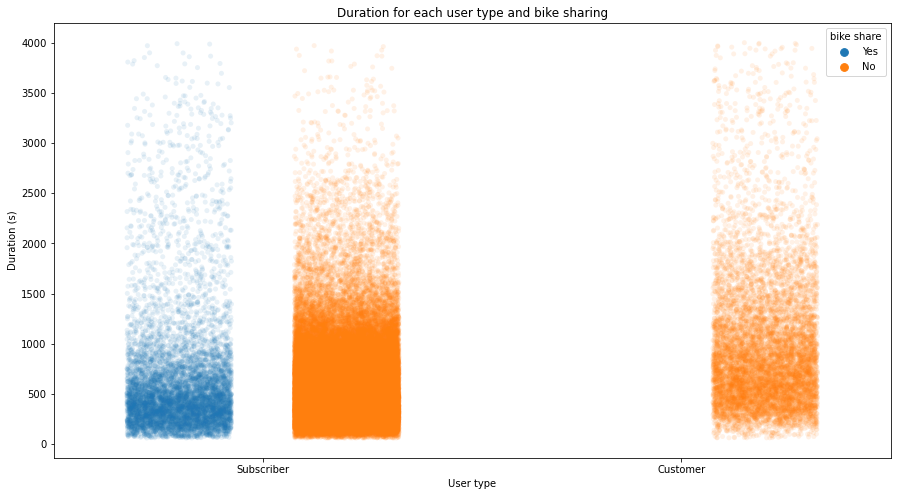

In [18]:
plt.figure(figsize=(15,8))
sb.stripplot(data=df.query('duration_sec <= 4000'),x='user_type', y='duration_sec',
             hue='bike_share_for_all_trip', dodge=True, jitter=0.25, alpha=0.1)
plt.legend(title = 'bike share');
plt.title('Duration for each user type and bike sharing')
plt.xlabel('User type')
plt.ylabel('Duration (s)');

Sharing are only for subscribers so there are no sharing in customers <br/>
Subscribers have higher duration <br/>
In subscribers the one that share bike have less duration 

#### Is there relation between gender, user type, and their duration ?

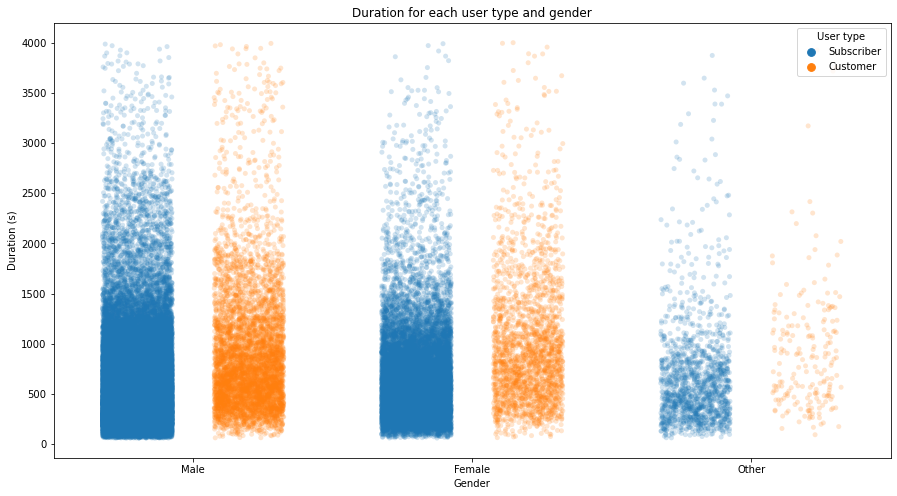

In [19]:
plt.figure(figsize=(15,8))
sb.stripplot(data=df.query('duration_sec <= 4000'),x='member_gender', y='duration_sec', 
             hue='user_type', dodge=True, jitter=0.25, alpha=.2)
plt.legend(title = 'User type');
plt.title('Duration for each user type and gender')
plt.xlabel('Gender')
plt.ylabel('Duration (s)');

We can see that for each gender mostly are subscribers and have higher duration

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the first plot I found that sharing bike are only allowed for subscribers 

### Were there any interesting or surprising interactions between features?

> In the user type at first we fount that customer have higher duration but in this section it shows otherwise

## Conclusions
> The dataset contain good amount of data which help found an interesting results like:
> - The ride are usully between 3 - 12 minutes
> - The users are mostly born between 1980 to 1996
> - Males are the majority of the users with 74.3%
> - The users that don't share bike have higher ride time
> - At first I found that customer have higher duration but after further investigation I found that subscribers are higher <br/>
> At the end I wish there was more column to work with like date and city.